Tutorial
================




Quickstart
-------------

Here is how to fit a simple likelihood function:

In [1]:
paramnames = ['Hinz', 'Kunz']

def loglike(z):
    return -0.5 * (((z - 0.5) / 0.01)**2).sum()

def transform(x):
    return 10. * x - 5.

from snowline import ReactiveImportanceSampler

sampler = ReactiveImportanceSampler(paramnames, loglike, transform)

sampler.run()

[snowline]     from: [0.57843083 0.54841861]


[snowline]     error: [0.04 0.04]


FCN = 8.504590349689342e-06 
 TOTAL NCALL = 33 
 NCALLS = 33 
 
 
 EDM = 8.504597446812856e-06 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.550004,0.001,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                0.5000 +- 0.0100
    Kunz                0.5000 +- 0.0100


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.550004,0.001,,,0,1,No
1,x1,0.55,0.000999999,,,0,1,No


+,x0,x1
x0,1.00,-0.00
x1,-0.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 66.859%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 11 to 1 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1254


[snowline] Status: Have 664 total effective samples, done.



logZ = -12.004 +- 0.016

    Hinz                0.5002 +- 0.0093
    Kunz                0.5001 +- 0.0094


{'z': 6.121768494660925e-06,
 'zerr': 9.778365113340843e-08,
 'logz': -12.003659533467909,
 'logzerr': 0.01584687737856605,
 'ess': 0.8306634927133046,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 1254,
 'posterior': {'mean': [0.5002100640679656, 0.500095357345468],
  'stdev': [0.009324597600373989, 0.009429434293540989],
  'median': [0.5002633361636803, 0.5000592725506969],
  'errlo': [0.4908281363332101, 0.4908949130735021],
  'errup': [0.5096153847101901, 0.5095015916628629]},
 'samples': array([[0.51847607, 0.50031419],
        [0.48916595, 0.4964772 ],
        [0.48966908, 0.49609046],
        ...,
        [0.50308996, 0.52098058],
        [0.48078254, 0.49163388],
        [0.51788436, 0.49042943]])}

This gave us error estimates and even estimated the evidence (Z)!

In [2]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 1254 times.


Visualisation
--------------------

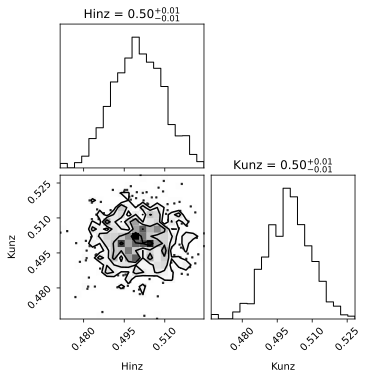

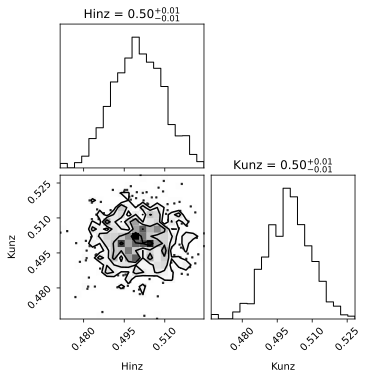

In [3]:
import corner
corner.corner(sampler.results['samples'], labels=paramnames, show_titles=True);

Advanced usage
-----------------------

Lets try a function that cannot be described by a simple gaussian.

In [4]:

paramnames = ['Hinz', 'Kunz'] #, 'Fuchs', 'Gans', 'Hofer']

def loglike_rosen(theta):
    a = theta[:-1]
    b = theta[1:]
    return -2 * (100 * (b - a**2)**2 + (1 - a)**2).sum()

def transform_rosen(u):
    return u * 20 - 10

sampler = ReactiveImportanceSampler(paramnames, loglike_rosen, transform=transform_rosen)
sampler.run(min_ess=1000, max_ncalls=1000000)


[snowline]     from: [0.58502399 0.64137597]


[snowline]     error: [0.04 0.04]


FCN = 1.5438574401618172e-05 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 1.532095749260301e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.550057,0.0244292,,,0,1,No
1,x1,0.550102,0.0489189,,,0,1,No


Maximum likelihood: L = -0.0 at:
    Hinz                1.00 +- 0.49
    Kunz                1.00 +- 0.98


+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,x0,0.550057,0.0245552,,,0,1,No
1,x1,0.550102,0.0491707,,,0,1,No


+,x0,x1
x0,1.00,1.00
x1,1.00,1.00


[snowline]     using correlated errors ...


[snowline] Initiating gaussian importance sampler


[snowline]     sampling 400 ...


[snowline]     sampling efficiency: 7.636%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 9 to 5 components


[snowline] Importance sampling 400 ...


[snowline] Likelihood function evaluations: 1331


[snowline] Status: Have 199 total effective samples, sampling 560 next.


[snowline]     sampling efficiency: 24.939%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 9 to 4 components


[snowline] Importance sampling 560 ...


[snowline] Likelihood function evaluations: 1891


[snowline] Status: Have 468 total effective samples, sampling 784 next.


[snowline]     sampling efficiency: 34.464%


[snowline] Optimizing proposal (from previous) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 9 to 4 components


[snowline] Importance sampling 784 ...


[snowline] Likelihood function evaluations: 2675


[snowline] Status: Have 807 total effective samples, sampling 1097 next.


[snowline]     sampling efficiency: 37.652%


[snowline] Optimizing proposal (from scratch) ...


[snowline]     running variational Bayes ...


[snowline]     reduced from 9 to 3 components


[snowline] Importance sampling 1097 ...


[snowline] Likelihood function evaluations: 3772


[snowline] Status: Have 227 total effective samples, sampling 1535 next.



logZ = -8.186 +- 0.062

    Hinz                0.93 +- 0.28
    Kunz                0.94 +- 0.53


{'z': 0.0002785050719200497,
 'zerr': 1.7797202105897182e-05,
 'logz': -8.186074287200647,
 'logzerr': 0.061943858528078266,
 'ess': 0.07027069704402318,
 'paramnames': ['Hinz', 'Kunz'],
 'ncall': 3772,
 'posterior': {'mean': [0.9308315565168493, 0.9425510318025457],
  'stdev': [0.28222458477378715, 0.5292537458321681],
  'median': [0.934488248709286, 0.861655340503269],
  'errlo': [0.5850081520267452, 0.3567512519148064],
  'errup': [1.2499902303602202, 1.5484353582945574]},
 'samples': array([[0.50018225, 0.20881789],
        [1.26036353, 1.53925363],
        [1.23306765, 1.4992189 ],
        ...,
        [0.75975621, 0.55314246],
        [0.57646141, 0.43793153],
        [1.14470524, 1.24144435]])}

This already took quite a bit more effort.

In [5]:
print("Loglikelihood was called %d times." % sampler.results['ncall'])

Loglikelihood was called 3772 times.


Lets see how well it did:

In [6]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]


Removed no burn in


(-0.5, 4.0)

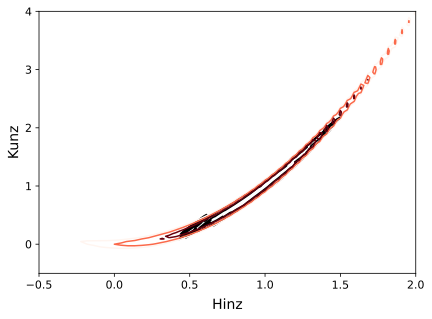

In [7]:
import numpy as np
x = np.linspace(-0.5, 4, 100)
a, b = np.meshgrid(x, x)
z = -2 * (100 * (b - a**2)**2 + (1 - a)**2)

g = plots.get_single_plotter()
g.plot_2d(mcsamples, paramnames)
plt.contour(a, b, z, [-3, -2, -1], cmap='Reds')
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 4);

As you can see, the importance sampler was not able to perfectly follow the rosenbrock curvature. But it is a good start to roughly understand the uncertainties!

Removed no burn in


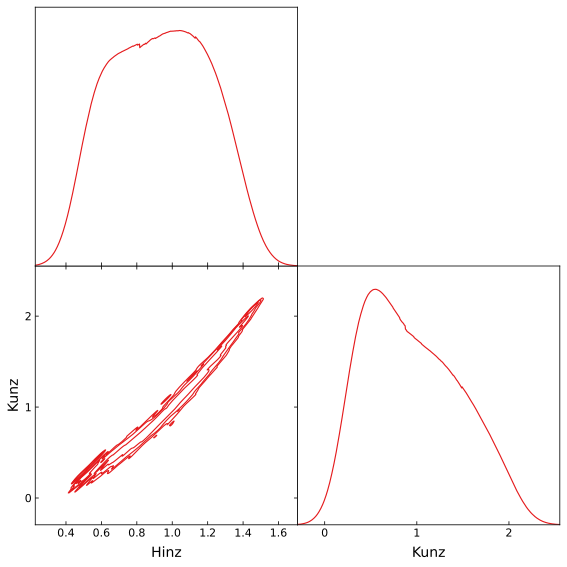

In [8]:
from getdist import MCSamples, plots
import matplotlib.pyplot as plt

samples_g = MCSamples(samples=sampler.results['samples'],
                       names=sampler.results['paramnames'],
                       label='Gaussian',
                       settings=dict(smooth_scale_2D=3), sampler='nested')

mcsamples = [samples_g]

g = plots.get_subplot_plotter(width_inch=8)
g.settings.num_plot_contours = 3
g.triangle_plot(mcsamples, filled=False, contour_colors=plt.cm.Set1.colors)

#corner.corner(sampler.results['samples'], labels=sampler.results['paramnames'], show_titles=True);